# 在python中使用ChatGPT





**版权声明：版权归属中山大学社会学系博士生贾梦真，为2023中山大学人工社会与计算社会科学讲习班学习资料，勿进行传播。**

- 贾梦真      
- 13250582930@163.com
- 2023年8月16日

--------------------------------------------------------------------------------

**学习目标**
- 1.在进行数据分析过程中调用大语言模型帮助解决问题；
- 2.掌握向人工智能提问的方法；


**准备条件:**
- ChatGPT的secret key
- 网络条件符合openai的服务范围
- 如果以上条件不能实现，可以调用其他大语言模型API也可实现类似效果。

## 一些大模型API使用攻略：
### 1. token问题

- openai调用是按照token计价格；
- 单个文本输入量过大可能会导致无法分析或者报错。
- 大概来讲，1K token大概是750个英文单词，500个中文汉字，1Ktokens0.002美元。

参考链接：  

- [openai收费标准和token计算](https://chatgptboke.com/openai-chatgpt-api-price.html)  
- [openai在线工具计算token的消耗量](https://platform.openai.com/tokenizer)



使用计算一些字符串的token值：
1. 我爱北京天安门
2. sun yat-sen
3. お誕生日おめでとう

### 2. 网络问题
可参考以下方法：
- 降低urllib3包的版本；
- 更换更稳定的梯子或节点；
- 在apirequestor文件中修改proxy的设置。


[修复连接问题参考资料](https://github.com/Significant-Gravitas/Auto-GPT/issues/1128)

### 3. API获取和调用问题

**API获取**
- 注册账号openai会送，有效期限制；[获取APIkey的页面](https://platform.openai.com/account/api-keys)

- Azure服务器（
[可参考教程1](https://learn.microsoft.com/zh-cn/azure/ai-services/openai/chatgpt-quickstart?tabs=command-line&pivots=programming-language-studio) [可参考教程2](https://www.sunpop.cn/chatgpt_in_china_with_azure_openai_api_free_1_year_odoo/) ）
- 淘宝购买组织API代码；（玩一玩模型可以，合法性和信息泄露问题）

**API调用的三种方法**

1.   直接在代码中使用openai.api_key = "sk-……"；
2.   将openaiAPIkey设置为环境变量，更安全的方式；  
调用方式：
[新手如何设置环境变量和调用](https://zhuanlan.zhihu.com/p/627665725)

- 将openai的API设置为环境变量
- 在Python中调用
```
openai_api_key = os.getenv("OPENAI_API_KEY")
print("OpenAI API Key:", openai_api_key)

```
3.  将openai API保存在一个txt文件中，在程序中调用
    
   调用方式： ```openai.api_key_path="/content/api_key.txt```


[参考链接](https://zhuanlan.zhihu.com/p/627665725)

### 4. 使用速率限制的问题
- 超出速率限制会出现：“you are being rate limited” or “Error code: 429”    
- 速率限制有两个标准：按照每分钟token数和每分钟request数量，任何一个超出都会报错；
- 由于输入输出都会消耗token，可以从限制输出字数或者设定request访问速度两种方式防止速率限制； [解决速率限制的方法](https://github.com/openai/openai-cookbook/blob/main/examples/How_to_handle_rate_limits.ipynb)
- 各种账户的速率限制标准信息可见以下[链接](https://aizh.cc/?thread-49.htm);
- 查看自己账号的速率标准可以从以下[链接](https://platform.openai.com/account/rate-limits)进入。


先把secret key准备好粘贴在这里：sk-.................

## 实现简单提问

### 作为普通使用者在聊天框提问

详细内容见PPT演示


### 作为开发人员，在程序中调用和提问

首先需要安装 OpenAI 库：

pip install openai

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.0 MB/s eta 0:00:00


In [1]:
import openai
openai.api_key="<自己的APIkey>"

### 关键函数`openai.Completion.create`的常用参数：
- `model (string, required):`
要使用的模型，可以通过下面代码来获得可用的模型：

```
import os
import openai
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.Model.list()
```

- `prompt (string, required):`
这是你提供给模型的文本片段，作为生成文本的起点或上下文。你可以在 prompt 中写入一句或多句话，以指导模型生成接下来的内容。

- `max_tokens (integer):`
用于控制生成文本的长度。它指定生成文本的最大 token 数量。可以使用这个参数来限制生成的文本长度，防止生成过长的结果。

- `temperature (float):`
- 较高的temperature将使模型更有可能生成新颖、独特的文本，    
- 而较低的温度则更有可能生成常见或常规的文本。

根据自己需求，可以使用这些参数来调整生成的文本结果。

In [2]:
# -*- coding: utf-8 -*-

# 一个封装 OpenAI 接口的函数，参数为 Prompt，返回对应结果

def get_completion(prompt, model="gpt-3.5-turbo"):
    '''
    prompt: 对应的提示词
    model: 调用的模型，默认为 gpt-3.5-turbo(ChatGPT)，有内测资格的用户可以选择 gpt-4
    '''
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0) # 模型输出的温度系数，控制输出的随机程度
    # 调用 OpenAI 的 ChatCompletion 接口
    return response.choices[0].message["content"]

In [ ]:
get_completion("1+1=?")

'1+1=2'

In [ ]:
get_completion("我是一个计算社会科学的初学者，请问怎么学习python用于数据分析？")

'学习Python用于数据分析可以按照以下步骤进行：\n\n1. 学习Python基础知识：首先，你需要学习Python的基本语法、数据类型、控制流程等基础知识。可以通过在线教程、书籍或者视频教程来学习。\n\n2. 学习Python的数据分析库：Python有很多强大的数据分析库，如NumPy、Pandas、Matplotlib等。你可以逐个学习这些库的使用方法，了解它们提供的功能和常用的操作。\n\n3. 实践项目：通过实践项目来巩固所学知识。可以选择一些开源的数据集，使用Python进行数据清洗、分析和可视化。这样可以帮助你更好地理解和应用所学的知识。\n\n4. 参考资料：有很多优秀的学习资源可以帮助你学习Python数据分析，如《Python for Data Analysis》、《Python数据分析实战》等书籍，以及一些在线教程和视频教程。\n\n5. 加入社区：加入一些Python数据分析的社区或者论坛，与其他学习者交流经验，获取帮助和建议。\n\n6. 持续学习：数据分析是一个不断发展的领域，新的工具和技术不断涌现。因此，要保持持续学习的态度，关注最新的发展和趋势。\n\n总之，学习Python用于数据分析需要坚持不懈的学习和实践，通过不断的练习和项目实践来提高自己的技能。'

## 使用python+GPT辅助数据分析

**这部分prompt在Python中可以调用，在聊天框中也同样可用。（这里是为了帮助大家学会api调用，才选择这里讲解）**

API调用的好处在于
1.   数据处理过程中向chatgpt求助不需要频繁切窗口。
2.   将本地的数据处理和大模型结合起来，使用大模型解决问题。
3.   满足模型微调、开发、分析等需求。
**因此，对以下内容的关注看个人研究需求。**






### 探索数据和可视化

**可用的提示词**

- 探索数据：Explore a Dataset
Prompt: I want you to act as a data scientist and code for me. I have a dataset of [describe dataset]. Please write code for data visualization and exploration.
- 我想让你担任数据科学家并为我编写代码。我有一个数据集。请编写代码的数据可视化和探索。

- 可视化：Visualize Data with Matplotlib
Prompt: I want you to act as a coder in Python. I have a dataset [name] with columns [name]. [Describe graph requirements]
- 我希望你能扮演一个Python程序员的角色。我有一个名为*name* 的数据集，其中包含*name* 列,[描述图形要求]

In [ ]:
#开始使用ChatGPT
prompt =f"""
I want you to act as a coder in Python. \
I have a dataset load_iris in sklearn  with 'sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','class'.\
I need a corplot with all variables """
response=get_completion(prompt)
print(response)

Sure! I can help you with that. Here's a Python code snippet that loads the iris dataset from sklearn and creates a correlation plot using the seaborn library:

```python
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

# Create a dataframe from the dataset
df = pd.DataFrame(data, columns=feature_names)

# Add the 'class' column to the dataframe
df['class'] = iris.target_names[iris.target]

# Create a correlation matrix
corr_matrix = df.corr()

# Create a correlation plot using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()
```

Make sure you have the necessary libraries installed (seaborn, pandas, and matplotlib) before running this code. The correlation plot will show the correlation coefficients between all the variables in the iris dataset.


<AxesSubplot:>

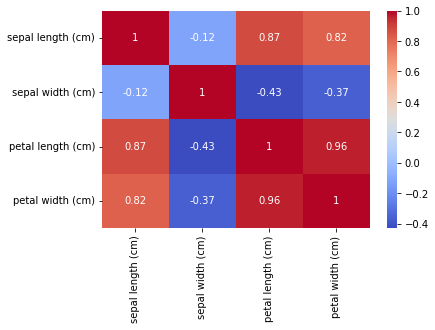

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
# Load the iris dataset
iris = load_iris()
# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target_names[iris.target]
# Compute the correlation matrix
corr = df.corr()
# Create a correlation plot using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Display the plot
plt.show()

###  建立机器学习模型和模型解释

**一些提示词示例**
1. 训练模型：Train a Classification Model
Prompt: I want you to act as a data scientist and code for me. I have a dataset of [describe dataset]. Please build a machine learning model that predicts [target variable].
我想让你担任数据科学家并为我编写代码。我有一个数据集。请建立一个机器学习模型来预测目标变量。

2. 使用TPOT进行自动机器学习：Automatic Machine Learning with TPOT
Prompt: I want you to act as an automatic machine learning (AutoML) bot using TPOT for me. I am working on a model that predicts [...]. Please write Python code to find the best classification model with the highest AUC score on the test set.
提示：我希望你能充当一个自动机器学习（AutoML）机器人，为我使用TPOT。我正在开发一个能预测[...]的模型。请编写Python代码，找到在测试集上具有最高AUC分数的最佳分类模型。

3. 模型解释： Get Feature Importance
Prompt: I want you to act as a data scientist and explain the model's results. I have trained a decision tree model and I would like to find the most important features. Please write the code.
提示：我希望你扮演一个数据科学家，解释模型的结果。我训练了一个决策树模型，我想找出最重要的特征。请编写代码。

4. 模型解释：Explain Model with SHAP
Prompt: I want you to act as a data scientist and explain the model's results. I have trained a scikit-learn XGBoost model and I would like to explain the output using a series of plots with SHAP. Please write the code.
我希望你扮演一个数据科学家的角色，解释模型的结果。我已经训练了一个scikit-learn XGBoost模型，并且我想使用一系列SHAP图来解释输出结果。请写出代码。


In [ ]:

prompt=f"""
"我想让你担任数据科学家并为我编写代码。\
我有一个数据集如下格式columns name:('x1','x2','x3'，'x4'....'x30',y),y为二分类变量。\
请建立决策树模型。请输出python代码和解释，用Markdown格式输出"
"""
response=get_completion(prompt)
print(response)

```python
# 导入所需的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 读取数据集
data = pd.read_csv('data.csv')

# 划分特征和目标变量
X = data.drop('y', axis=1)
y = data['y']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立决策树模型
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)
```

以上是使用Python编写的决策树模型的代码。首先，我们导入了所需的库，包括pandas用于数据处理，sklearn.tree中的DecisionTreeClassifier用于建立决策树模型，sklearn.model_selection中的train_test_split用于划分训练集和测试集，sklearn.metrics中的accuracy_score用于计算准确率。

然后，我们读取了数据集，并将特征和目标变量分开。接下来，使用train_test_split将数据集划分为训练集和测试集，其中测试集占总数据集的20%。

然后，我们建立了一个决策树模型，并使用fit方法在训练集上进行训练。然后，使用predict方法在测试集上进行预测。

最后，我们使用accuracy_score计算了模型在测试集上的准确率，并将结果打印出来。

决策树模型是一种基于树结构的分类模型，通过对特征进行划分，逐步构建决策树，从而实现对目标变量的预

In [ ]:
prompt=f"""
我想让你担任数据科学家并为我编写代码.\
我有一个从sklearn导入的iris数据集,请建立一个决策树模型，并进行可视化分析，\
输出为Markdown格式。
"""
response=get_completion(prompt)
print(response)

当然，我很乐意帮助您编写代码。以下是使用sklearn库建立决策树模型并进行可视化分析的代码：

```python
# 导入所需的库
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 建立决策树模型
model = DecisionTreeClassifier()
model.fit(X, y)

# 可视化决策树
fig = plt.figure(figsize=(12,10))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

# 保存决策树可视化结果为Markdown格式
plt.savefig('decision_tree.png')
print('![Decision Tree](decision_tree.png)')
```

这段代码首先导入了所需的库，然后加载了iris数据集。接下来，使用`DecisionTreeClassifier`类建立了一个决策树模型，并使用`fit`方法拟合数据。

然后，使用`tree.plot_tree`函数可视化了决策树模型，并设置了特征名称和类别名称。最后，使用`plt.savefig`保存可视化结果为一张图片，并输出Markdown格式的图片链接。

您可以将以上代码保存为一个Python脚本，运行后即可得到决策树的可视化结果，并将结果以Markdown格式输出。


![Decision Tree](decision_tree.png)
## 决策树模型可视化分析
决策树模型可视化结果如下：
![Decision Tree](decision_tree.png)


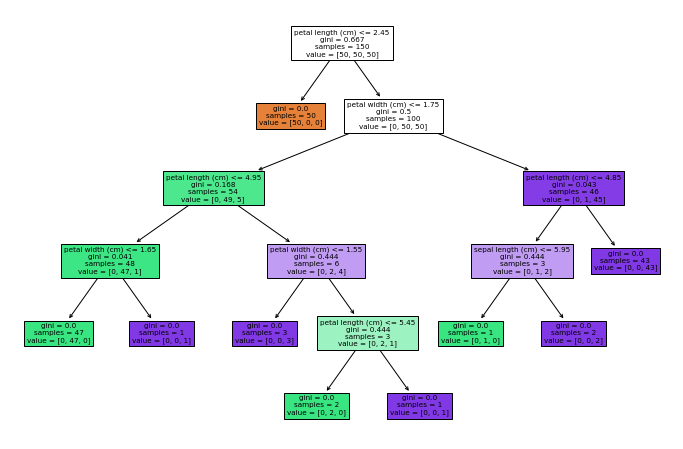

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 建立决策树模型
model = DecisionTreeClassifier()
model.fit(X, y)

# 可视化决策树
fig = plt.figure(figsize=(12, 8))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

# 保存决策树可视化结果为Markdown格式
plt.savefig('decision_tree.png')
print('![Decision Tree](decision_tree.png)')

# 输出Markdown格式
print('## 决策树模型可视化分析')
print('决策树模型可视化结果如下：')
print('![Decision Tree](decision_tree.png)')


### 帮助debug

**一些有用的提示词**
1. **帮助修改函数**
Prompt: I want you to act as a software developer. This code is supposed to [expected function]. Please help me debug this Python code that cannot be run. [Insert function]
- 提示：我希望你扮演一个软件开发人员的角色。这段代码的预期功能是[插入预期功能]。请帮我调试这段无法运行的Python代码。[插入函数]

2. **帮助debug**  Correct R Code
Prompt: I want you to act as a SQL code corrector. This code does not run in . Can you correct it for me? [R code here]
- 提示：我希望你扮演一个R代码修正者的角色。这段代码在R中无法运行。你能帮我修正一下吗？[在此处插入代码]

**帮助修改函数**

如果一个维度的值从 10 到 100，而另一个维度的值从 100 到 100000，则很难比较两者的相对变化。
Z-Score 将数据按比例缩放,使之落入一个特定区间。公式如下：

$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$

为了实现这个功能，我们编一个标准化的函数：

In [ ]:
def centralization(data):
    x_min=min(data)
    x_max=max(data)
    cen=(x-x_max)/(x_max-x_min)
    return cen

In [ ]:
df1=(1,4,5,4,9)
print(centralization(df1))
df2=(23,44,67,89)
print(centralization(df2))

NameError: name 'x' is not defined

In [ ]:
text = f"""
def centralization(data):
x_min=min(data)
x_max=max(data)
cen=(x-x_max)/(x_max-x_min)
return cen
"""
prompt_1 = f"""
我希望你扮演一个软件开发人员的角色。这段代码的预期功能是得到z_score。请帮我调试这段无法运行的Python代码。
Text:
```{text}```
               """
response = get_completion(prompt_1)
print("prompt 1:")
print(response)

prompt 1:
这段代码存在几个问题。首先，变量`x`在函数中没有定义，应该使用`data`来计算`cen`。其次，函数中的变量名`cen`与函数名重复，应该修改为其他名称。最后，缩进也存在问题，需要进行修正。以下是修正后的代码：

```python
def centralization(data):  
    x_min = min(data)
    x_max = max(data)
    cen = [(x - x_max) / (x_max - x_min) for x in data]
    return cen
```

修正后的代码会计算给定数据列表`data`中每个元素的中心化值，并返回一个包含中心化值的列表`cen`。


In [ ]:
import statistics

def centralization(data):
    x_min = min(data)
    x_max = max(data)
    cen = [(x - x_max) / (x_max - x_min) for x in data]
    cen_rounded = [round(val, 2) for val in cen]
    return cen_rounded

In [ ]:
df1=(1,4,5,4,9)
print(centralization(df1))
df2=(23,44,67,89)
print(centralization(df2))

[-1.0, -0.62, -0.5, -0.62, 0.0]
[-1.0, -0.68, -0.33, 0.0]


### 其他辅助数据分析的场景

1. **提高代码的速度：** Improve Code Speed
Prompt: I want you to act as a software developer. Please help me improve the time complexity of the code below. [Insert code]
- 我希望你扮演一个软件开发人员的角色。请帮助我改善以下代码使代码运行更快。[插入代码]


2. **优化pandas代码：** Optimize Pandas Code
Prompt: I want you to act as a code optimizer. Can you point out what's wrong with the following pandas code and optimize it? [Insert code here]
- 我希望你扮演一个代码优化者的角色。你能指出以下Pandas代码的问题并对其进行优化吗？[插入代码]


3. **写正则表达式：** Write a Regex in Python
Prompt: I want you to act as a coder. Please write me a regex in Python that [describe regex]
- 我希望你扮演一个程序员的角色。请为我在Python中编写一个[描述正则表达式]

4. **将python代码转换为R：** Translate Python to R
Prompt: I want you to act as a code translator. Can you please convert the following code from Python to R? [Insert code]
- 我希望你扮演一个代码转换者的角色。你能将以下代码从Python转换为R吗？[插入代码]

5. **清洗文本数据：** Clean and Preprocess Text Data
Prompt: I want you to act as a data scientist and code for me. I have a dataset of text data [describe dataset]. Please help me clean and preprocess the data for further analysis.
- 我希望你能扮演一个数据科学家的角色，为我编写代码。我有一个文本数据集[描述数据集]。请帮我清洗和预处理数据，以便进行进一步的分析。（或者指定格式：帮助我把以下不规则的文本转换为JSON格式。）

### 帮助学习模型和代码

In [ ]:
prompt = f"""
我是一名计算社会科学的研究者，请你帮我使用Python模拟Schelling model，输出为Markdown格式并标注代码注释。
"""
response=get_completion(prompt)
print(response)

'当然可以帮你实现Schelling模型的Python模拟，并输出为Markdown格式。下面是一个示例代码，带有详细的注释说明：\n\n```python\nimport numpy as np\nimport random\nimport matplotlib.pyplot as plt\n\ndef initialize_grid(grid_size, empty_ratio, similarity_threshold):\n    """\n    初始化网格，随机分配不同类型的个体\n\n    参数：\n    grid_size (int): 网格的大小\n    empty_ratio (float): 空置比例，即网格上空置个体的比例\n    similarity_threshold (float): 相似度阈值，用于判断个体是否满足满意度条件\n\n    返回：\n    grid (numpy.ndarray): 初始化后的网格\n    """\n    grid = np.zeros((grid_size, grid_size))  # 创建一个空的网格\n\n    # 随机分配不同类型的个体\n    for i in range(grid_size):\n        for j in range(grid_size):\n            if random.random() > empty_ratio:\n                grid[i, j] = random.choice([1, 2])  # 1和2分别代表两种不同类型的个体\n\n    return grid\n\ndef calculate_similarity(grid, i, j, similarity_threshold):\n    """\n    计算个体(i, j)的相似度\n\n    参数：\n    grid (numpy.ndarray): 当前的网格\n    i (int): 个体的行坐标\n    j (int): 个体的列坐标\n    similarity_threshold (float): 相似度阈值，用于判断个体是否满足满意度条件\n\n    返回：\n    similarity (float): 相似

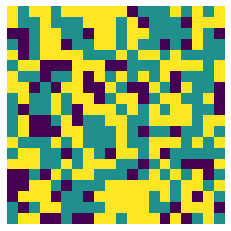

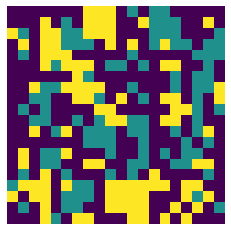

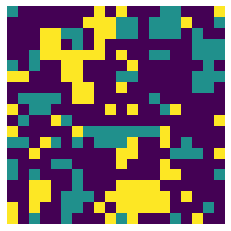

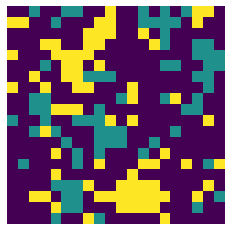

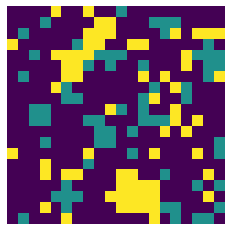

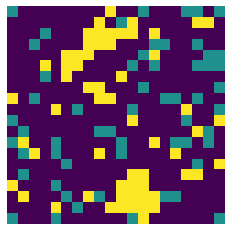

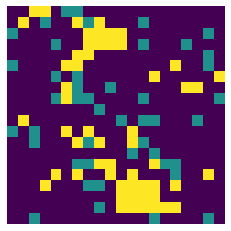

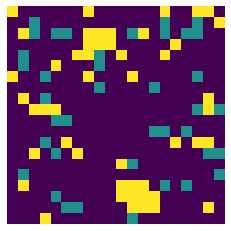

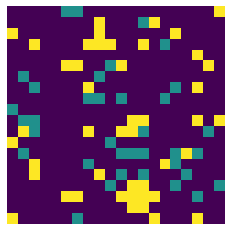

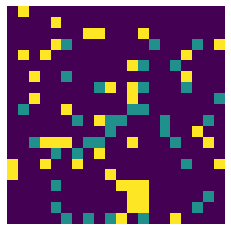

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def initialize_grid(grid_size, empty_ratio, similarity_threshold):
    """
    初始化网格，随机分配不同类型的个体

    参数：
    grid_size (int): 网格的大小
    empty_ratio (float): 空置比例，即网格上空置个体的比例
    similarity_threshold (float): 相似度阈值，用于判断个体是否满足满意度条件

    返回：
    grid (numpy.ndarray): 初始化后的网格
    """
    grid = np.zeros((grid_size, grid_size))  # 创建一个空的网格

    # 随机分配不同类型的个体
    for i in range(grid_size):
        for j in range(grid_size):
            if random.random() > empty_ratio:
                grid[i, j] = random.choice([1, 2])  # 1和2分别代表两种不同类型的个体

    return grid

def calculate_similarity(grid, i, j, similarity_threshold):
    """
    计算个体(i, j)的相似度

    参数：
    grid (numpy.ndarray): 当前的网格
    i (int): 个体的行坐标
    j (int): 个体的列坐标
    similarity_threshold (float): 相似度阈值，用于判断个体是否满足满意度条件

    返回：
    similarity (float): 相似度
    """
    current_type = grid[i, j]  # 当前个体的类型

    # 统计邻居中与当前个体类型相同的个数
    same_type_count = 0
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if x >= 0 and x < grid.shape[0] and y >= 0 and y < grid.shape[1]:
                if grid[x, y] == current_type:
                    same_type_count += 1

    similarity = same_type_count / 9  # 计算相似度

    return similarity

def update_grid(grid, similarity_threshold):
    """
    更新网格，根据满意度条件移动个体

    参数：
    grid (numpy.ndarray): 当前的网格
    similarity_threshold (float): 相似度阈值，用于判断个体是否满足满意度条件

    返回：
    new_grid (numpy.ndarray): 更新后的网格
    """
    new_grid = np.copy(grid)  # 创建一个新的网格，用于存储更新后的结果

    # 遍历网格中的每个个体
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] != 0:  # 只考虑非空置个体
                similarity = calculate_similarity(grid, i, j, similarity_threshold)
                if similarity < similarity_threshold:  # 如果相似度低于阈值，则移动个体
                    empty_cells = np.argwhere(grid == 0)  # 找到所有空置的位置
                    if len(empty_cells) > 0:
                        new_location = random.choice(empty_cells)  # 随机选择一个空置位置
                        new_grid[new_location[0], new_location[1]] = grid[i, j]  # 将个体移动到新位置
                        new_grid[i, j] = 0  # 原位置变为空置

    return new_grid

def plot_grid(grid):
    """
    绘制网格

    参数：
    grid (numpy.ndarray): 当前的网格
    """
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.axis('off')
    plt.show()

# 设置模型参数
grid_size = 20  # 网格大小
empty_ratio = 0.2  # 空置比例
similarity_threshold = 0.5  # 相似度阈值

# 初始化网格
grid = initialize_grid(grid_size, empty_ratio, similarity_threshold)

# 模拟迭代更新
for i in range(10):
    plot_grid(grid)  # 绘制当前网格
    grid = update_grid(grid, similarity_threshold)  # 更新网格
##这段代码实现了Schelling模型的基本逻辑，包括初始化网格、计算相似度、更新网格和绘制网格等功能。
##你可以根据需要调整模型参数和迭代次数。运行代码后，会显示每次迭代后的网格图像。




### 更多的prompt可参考
- [用于数据分析的prompt集合1](https://docs.kanaries.net/articles/chatgpt-prompt-data-scientist)
- [用于数据分析的prompt集合2](https://clickup.com/templates/ai-prompts/data-analysis)


针对R用户，可以参考R+ChatGPT讲义

# 使用合适的prompt

## 使用提示词的两个原则
- **a. 指令清晰具体**
- **b. 给模型时间去思考**

### 指令清晰具体

#### **使用分隔符清晰地表示输入的不同部分**

分隔符可以是：```，""，<>，:，\<tag> \</tag>等。

- 可以使用任何明显的标点符号将特定的文本部分与 Prompt 的其余部分分开。标记的形式不限，只需要让模型明确知道这是一个单独部分。
- 避免指令冲突。
- 给出一段话并要求 GPT 进行总结，使用 ``` 来作为分隔符。

In [ ]:
text = f"""
您应该提供尽可能清晰、具体的指示，以表达您希望模型执行的任务。\
这将引导模型朝向所需的输出，并降低收到无关或不正确响应的可能性。\
不要将写清晰的提示词与写简短的提示词混淆。\
在许多情况下，更长的提示词可以为模型提供更多的清晰度和上下文信息，从而导致更详细和相关的输出。
"""
# 需要总结的文本内容
prompt = f"""
把用三个反引号括起来的文本总结成一句话。
```{text}```
"""
# 指令内容，使用 ``` 来分隔指令和待总结的内容
response = get_completion(prompt)
print(response)

为了获得所需的输出，您应该提供清晰、具体的指示，避免与简短的提示词混淆，并使用更长的提示词来提供更多的清晰度和上下文信息。


#### **寻求结构化的输出**

- 输出可以是 Json、HTML 等格式。

- 使模型的输出更容易被我们解析和使用，例如，可以用Python将GPT的输出结果读入字典或列表中。

-这个例子中我们要求 GPT 生成三本书的标题、作者和类别，并要求 GPT 以 Json 的格式返回给我们，为便于解析，我们指定了 Json 的键。

In [ ]:
prompt = f"""
请生成包括书名、作者和类别的三本虚构书籍清单，\
并以 JSON 格式提供，其中包含以下键:book_id、title、author、genre。
"""
response = get_completion(prompt)
print(response)


{
  "books": [
    {
      "book_id": 1,
      "title": "The Great Gatsby",
      "author": "F. Scott Fitzgerald",
      "genre": "Fiction"
    },
    {
      "book_id": 2,
      "title": "To Kill a Mockingbird",
      "author": "Harper Lee",
      "genre": "Fiction"
    },
    {
      "book_id": 3,
      "title": "1984",
      "author": "George Orwell",
      "genre": "Science Fiction"
    }
  ]
}


#### **提供少量示例**（少样本提示词，Few-shot prompting）

- 即在要求模型执行实际任务之前，提供给它少量成功执行任务的示例。
- 可以极大改善模型输出的结果。

例如，在以下的示例中，我们告诉模型其任务是以一致的风格回答问题，并先给它一个孩子和祖父之间的对话的例子。孩子说，“请教我何为耐心”，祖父用下述风格的隐喻来回答。由于我们已经告诉模型要以一致的语气回答，因此现在我们问“请教我何为韧性”，由于模型已经有了这个少样本示例( few-shot example )，它将以类似的语气回答下一个任务。

In [ ]:
prompt = f"""
您的任务是以一致的风格回答问题。

<孩子>: 教我耐心。

<祖父母>: 挖出最深峡谷的河流源于一处不起眼的泉眼；最宏伟的交响乐从单一的音符开始；最复杂的挂毯以一根孤独的线开始编织。

<孩子>: 教我韧性。
"""
response = get_completion(prompt)
print(response)

<祖父母>: 韧性是一种坚持不懈的品质，就像大树在风雨中弯曲而不折断一样。它是通过面对困难和挑战而培养出来的，就像锻炼身体一样，只有经历过磨砺，才能变得更加坚强。记住，困难并不是终点，而是通往成功的必经之路。


### 给模型时间去思考

- 如果发现模型推理过程过于匆忙，导致得出了错误的结论，可以重新构思 Prompt ，要求模型在提供最终答案之前开展思维链，或进行一系列相关推理（a chain or series of relevant reasoning）。
- 如果您给模型一个在短时间内或用少量文字无法完成的复杂任务，它的输出结果就容易出错。这种情况对人来说也是类似：如果您要求某人完成复杂的数学问题，又不给足够时间计算出答案，他们也可能会犯错误。

#### 指定完成任务所需要的步骤

In [ ]:
text = f"""
Word embeddings, the coefficients from neural network models predicting the use of words in context, have now become inescapable in applications involving natural language processing. Despite a few studies in political science, the potential of this methodology for the analysis of political texts has yet to be fully uncovered. \
This paper introduces models of word embeddings augmented with political metadata and trained on large-scale parliamentary corpora from Britain, Canada, and the United States. \
We fit these models with indicator variables of the party affiliation of members of parliament, which we refer to as party embeddings.\
We illustrate how these embeddings can be used to produce scaling estimates of ideological placement and other quantities of interest for political research. \
To validate the methodology, we assess our results against indicators from the Comparative Manifestos Project, surveys of experts, and measures based on roll-call votes. \
Our findings suggest that party embeddings are successful at capturing latent concepts such as ideology, and the approach provides researchers with an integrated framework for studying political language.
"""
prompt_2 = f"""
1-用一句话概括下面用<>括起来的文本。
2-将摘要翻译成中文。
3-在英语摘要中列出每个概念的名称。
4-输出一个 JSON 对象，其中包含以下键：English_summary，num_names。

请使用以下格式：
文本：<要总结的文本>
摘要：<摘要>
翻译：<摘要的翻译>
名称：<英语摘要中的名称列表>
输出 JSON：<带有 summary 和 num_names 的 JSON>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nprompt 2:")
print(response)


prompt 2:
Summary: Word embeddings augmented with political metadata are used to analyze political texts and estimate ideological placement and other quantities of interest in political research.

Translation: 使用政治元数据增强的词嵌入技术来分析政治文本，并估计意识形态定位和其他政治研究中感兴趣的量。

Names: word embeddings, neural network models, political science, methodology, political metadata, parliamentary corpora, party affiliation, party embeddings, scaling estimates, ideological placement, Comparative Manifestos Project, surveys of experts, roll-call votes, latent concepts, ideology, integrated framework, political language.

JSON Output: {"English_summary": "Word embeddings augmented with political metadata are used to analyze political texts and estimate ideological placement and other quantities of interest in political research.", "num_names": 17}


**使用时注意事项：**




1.   **虚假知识**：模型偶尔会生成一些看似真实实则编造的知识,大模型的幻觉（Hallucination）。对内容可靠性需要自己考证。
2.   **注意token的消耗**：计算token消耗量
3.  **本质就是文本生成器** ：文本的生成质量对prompt的依赖很强，平时多利用它，积累prompt经验。


参考链接： https://medium.com/@stephensonebinezer/transform-your-topic-modeling-with-chatgpt-cutting-edge-nlp-f4654b4eac99

https://ts2.space/en/chatgpt-vs-traditional-topic-modeling-methods-a-comparison/